In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from os.path import exists
import json
import scipy.stats as stats
import math
import sklearn.linear_model as lm

import sys
sys.path.insert(0, "../src/")
import util as util

In [2]:
if exists('../data/encoded-SpeedDatingData-WithLocations.csv'):
    fullDatingDatabase = pd.read_csv('../data/encoded-SpeedDatingData-WithLocations.csv')
else:
    fullDatingDatabase = pd.read_csv("../data/encoded-SpeedDatingData.csv")
    fullDatingDatabase = util.getLocations(fullDatingDatabase,True)
    fullDatingDatabase.to_csv('../data/encoded-SpeedDatingData-WithLocations.csv',index=False)

In [3]:
if exists("../data/incomeByLocationDictionary.json") == False:
    incomeByLocationDictionary = dict()
    locationsDictionary = dict()
    with open("../data/locations.json") as d:
        locationsDictionary = json.load(d)
    locKeys = locationsDictionary.keys()
    for locKey in locKeys:
        location = locationsDictionary[locKey]
        lat = location[0]
        lon = location[1]
        targets = fullDatingDatabase[(fullDatingDatabase["lats"]==lat) & (fullDatingDatabase["lons"]==lon)]
        income = targets["income"].str.replace(',', '').astype(float).mean()
        if np.isnan(income) == False and np.isfinite(income):
            incomeByLocationDictionary[locKey] = income
    with open("../data/incomeByLocationDictionary.json","w") as fp:
        json.dump(incomeByLocationDictionary,fp)
    

In [4]:
columnList = ["iid","gender","round","order","pid","match","samerace","age","field_cd",
              "undergra","mn_sat","tuition","race","imprace","imprelig","from","zipcode","income","goal","date","go_out","career_c","sports","tvsports",
              "exercise","dining","museums","art","hiking","gaming","clubbing","reading","tv","theater","movies","concerts","music","shopping","yoga",
              "exphappy","expnum","attr1_1","sinc1_1","intel1_1","fun1_1","shar1_1","attr4_1","sinc4_1","intel4_1","fun4_1","shar4_1",
              "attr2_1","sinc2_1","intel2_1","fun2_1","shar2_1","attr3_1","sinc3_1","intel3_1","fun3_1","attr5_1","sinc5_1","intel5_1",
              "fun5_1","match_es","attr1_s","sinc1_s","intel1_s","fun1_s","shar1_s","attr3_s","sinc3_s","intel3_s","fun3_s","lats","lons","dec"]
nonBinaryCategoricalList = ["field_cd","undergra","race","zipcode","goal","date","go_out","career_c","zipcode_o"]
stringToFloatList = ["tuition","mn_sat","income"]
identityList = ["iid","pid"]
partnerList = [col for col in columnList if ((col not in identityList) and (col != "match") and (col != "samerace"))]
pointDistributionList = ["pf_o","1_1","4_1","2_1","1_s"]

In [5]:
columnDataDictionary = {"columnList": columnList,
                        "nonBinaryCategoricalList": nonBinaryCategoricalList,
                        "stringToFloatList": stringToFloatList,
                        "pointDistributionList": pointDistributionList,
                        "partnerList": partnerList}

with open('../data/columnDataDictionary.json', 'w') as fp:
    json.dump(columnDataDictionary, fp)

!rm -r ../data/processedData
!mkdir ../data/processedData

with open('../data/processedData/columnDataDictionary.json', 'w') as fp:
    json.dump(columnDataDictionary, fp)

In [6]:
blindDateData = fullDatingDatabase[columnList + ['wave','int_corr']]
blindDateData = util.switchNumbersAndCategoriesFromRawData(blindDateData)

../src/util.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[str(col)] = df[str(col)].str.replace(',', '').astype(float)
../src/util.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[stringcol] = df[stringcol].astype(str)


In [7]:
blindDateDataWave69 = blindDateData[(blindDateData['wave'].astype(int) >= 6) & (blindDateData['wave'].astype(int) <= 9)]
blindDateDataWaveNot69 = blindDateData[(blindDateData['wave'].astype(int) < 6) | (blindDateData['wave'].astype(int) > 9)]

iid int64
0.0% of data is nan. 0 out of 8378
283.675936977799 +/- 158.58336657825632


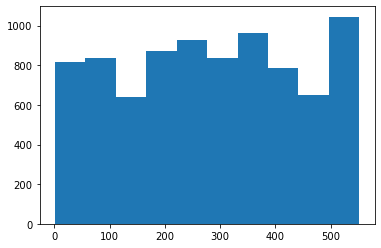



gender int64
0.0% of data is nan. 0 out of 8378
[0, 1]


round int64
0.0% of data is nan. 0 out of 8378
[5, 6, 7, 8, 9, 10, 11, 14, 15, 16, 18, 19, 20, 21, 22]


order int64
0.0% of data is nan. 0 out of 8378
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]


pid float64
0.11936022917164% of data is nan. 10 out of 8378
283.86376673040155 +/- 158.58489888970877


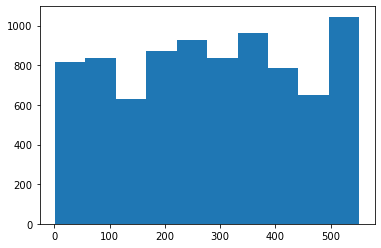



match int64
0.0% of data is nan. 0 out of 8378
[0, 1]


samerace int64
0.0% of data is nan. 0 out of 8378
[0, 1]


age float64
1.13392217713058% of data is nan. 95 out of 8378
26.358927924664975 +/- 3.566762556101457


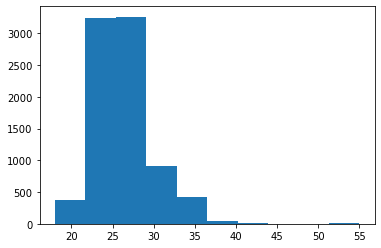



field_cd object
0.978753879207448% of data is nan. 82 out of 8378
['1.0', '17.0', '7.0', '2.0', '5.0', '6.0', '8.0', '11.0', 'nan', '9.0', '4.0', '18.0', '12.0', '15.0', '13.0', '14.0', '16.0', '10.0', '3.0']


undergra object
41.3463833850561% of data is nan. 3464 out of 8378
data varries across 242 values


mn_sat float64
62.60444020052518% of data is nan. 5245 out of 8378
1299.6552824768592 +/- 119.79802034467889


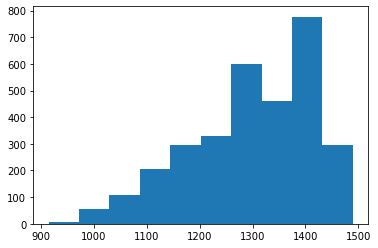



tuition float64
57.233229887801386% of data is nan. 4795 out of 8378
21174.926039631595 +/- 6748.661161666493


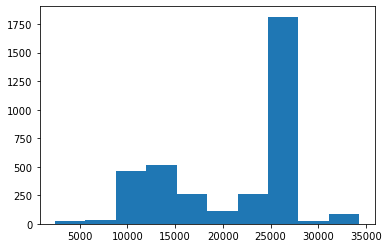



race object
0.751969443781332% of data is nan. 63 out of 8378
['nan', '4.0', '2.0', '1.0', '6.0', '3.0']


imprace float64
0.942945810455956% of data is nan. 79 out of 8378
3.7847933485962164 +/- 2.8457077597185734


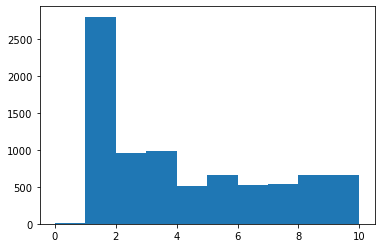



imprelig float64
0.942945810455956% of data is nan. 79 out of 8378
3.651644776479094 +/- 2.8052370077510074


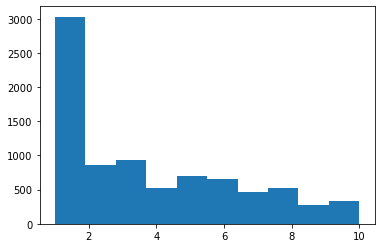



from object
0.942945810455956% of data is nan. 79 out of 8378
data varries across 270 values


zipcode object
12.699928383862497% of data is nan. 1064 out of 8378
data varries across 410 values


income float64
48.92575793745524% of data is nan. 4099 out of 8378
44887.606450105166 +/- 17206.9209616554


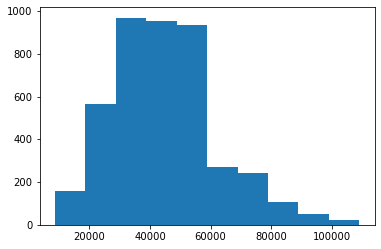



goal object
0.942945810455956% of data is nan. 79 out of 8378
['nan', '4.0', '2.0', '5.0', '1.0', '6.0', '3.0']


date object
1.157794222964908% of data is nan. 97 out of 8378
['nan', '7.0', '4.0', '5.0', '2.0', '1.0', '6.0', '3.0']


go_out object
0.942945810455956% of data is nan. 79 out of 8378
['nan', '7.0', '4.0', '2.0', '5.0', '1.0', '6.0', '3.0']


career_c object
1.647171162568632% of data is nan. 138 out of 8378
['nan', '15.0', '13.0', '9.0', '17.0', '7.0', '4.0', '2.0', '5.0', '1.0', '14.0', '16.0', '8.0', '10.0', '12.0', '6.0', '3.0', '11.0']


sports float64
0.942945810455956% of data is nan. 79 out of 8378
6.425231955657308 +/- 2.6190238915809467


In [ ]:
total = blindDateData.shape[0]
for col in columnList:
    colData = blindDateData[col]
    colData69 = blindDateDataWave69[col]
    colDataNot69 = blindDateDataWaveNot69[col]
    
    print(f'{col} {colData.dtype}')
    nanCount = sum([util.isNan(x) for x in colData])
    print(f'{100 * nanCount/total}% of data is nan. {nanCount} out of {total}')
    dataList = list(set(colData))
        
    if len(dataList)<=25:
        print(dataList)
    elif str(col) == 'met':
        print(colData.value_counts())
    else:
        if colData.dtype == "O":
            print(f"data varries across {len(dataList)} values")
        elif (("pf_o" in str(col)) or col.endswith("1_1") or col.endswith("4_1") or col.endswith("2_1") or col.endswith("1_s")):
            print(f"{colData69.mean()} +/- {colData69.std()}")
            fig = plt.figure()
            plt.hist(colData69)
            plt.title('Waves 6 - 9')
            plt.show()
            print(f"{colDataNot69.mean()} +/- {colDataNot69.std()}")
            fig = plt.figure()
            plt.hist(colDataNot69)
            plt.title('Excluding Waves 6 - 9')
            plt.show()
        else:
            print(f"{colData.mean()} +/- {colData.std()}")
            fig = plt.figure()
            plt.hist(colData)
            plt.show()
    print("\n")

In [ ]:
interestColumns = ["sports","tvsports","exercise","dining","museums","art","hiking","gaming","clubbing","reading","tv","theater","movies","concerts","music","shopping","yoga"]
gender0 = blindDateData[blindDateData['gender'] == 0]
gender1 = blindDateData[blindDateData['gender'] == 1]

In [ ]:
selectedIndecies = np.random.choice(gender0.shape[0],replace = False,size = (40))

In [ ]:
recordedCorr = []
pearsonCorr = []
spearmanCorr = []
for i in selectedIndecies:
    candidate = gender0.iloc[[i]]
    partner = gender1[(gender1['iid'] == float(candidate['pid'])) & (gender1['pid'] == float(candidate['iid']))]
    candidateInterests = []
    partnerInterests = []
    for col in interestColumns:
        candidateScore = float(candidate[col])
        partnerScore = float(partner[col])
        if (util.isNan(candidateScore) == False and util.isNan(partnerScore) == False):
            candidateInterests.append(candidateScore)
            partnerInterests.append(partnerScore)
    if len(candidateInterests) >= 2:
        recordedCorr.append(candidate['int_corr'])
        pearsonValue = stats.pearsonr(np.array(candidateInterests),np.array(partnerInterests))[0]
        spearmanValue = stats.spearmanr(np.array(candidateInterests),np.array(partnerInterests))[0]
        pearsonCorr.append(pearsonValue)
        spearmanCorr.append(spearmanValue)

pearsonError = np.mean((np.array(pearsonCorr) - np.array(recordedCorr))/np.array(recordedCorr))
spearmanError = np.mean((np.array(spearmanCorr) - np.array(recordedCorr))/np.array(recordedCorr))
print(f'Pearson Error {pearsonError}')
print(f'Spearman Error {spearmanError}')

In [ ]:
recordedArray = np.array(recordedCorr).reshape(-1,1)
pearsonArray = np.array(pearsonCorr).reshape(-1,1)
spearmanArray = np.array(spearmanCorr).reshape(-1,1)

util.plotCorrelation(recordedArray,pearsonArray,'pearson')
util.plotCorrelation(recordedArray,spearmanArray,'spearman')

In [ ]:
util.getLocation('92069','San Marcos')